In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=12,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [34]:
data = pd.read_excel('inflasi.xls',index_col=0)

In [35]:
data.head()

,Inflasi
Month,
2019-06-01,0.0328
2019-05-01,0.0332
2019-04-01,0.0283
2019-03-01,0.0248
2019-02-01,0.0257


In [36]:
data.describe()

,Inflasi
count,199.000000
mean,0.063147
std,0.033162
min,0.000000
25%,0.038550
50%,0.060400
75%,0.072850
max,0.183800


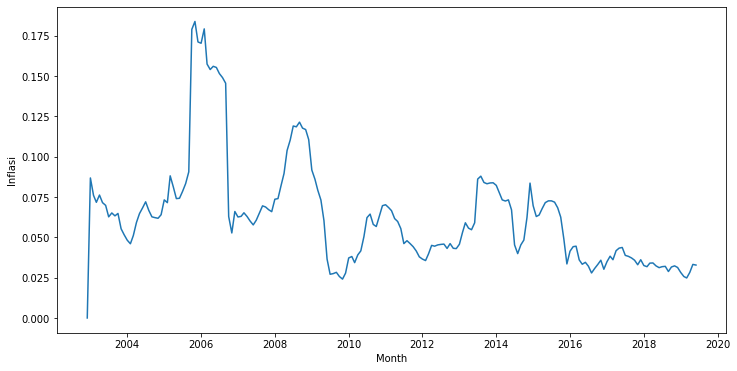

In [37]:
plt.xlabel("Month")
plt.ylabel("Inflasi")
plt.plot(data)

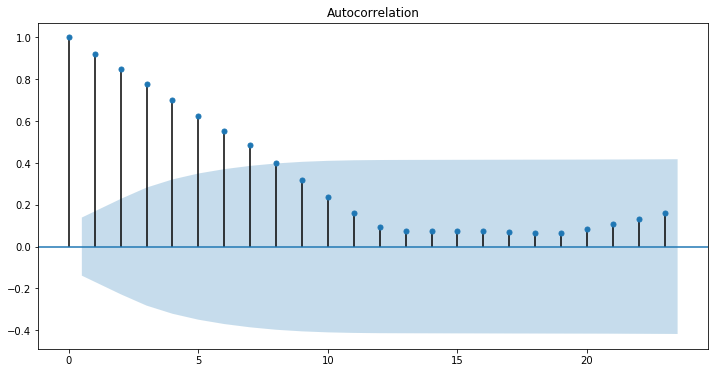

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

In [39]:
print ('Hasil dari Dickey-Fuller Test:')
dftest = adfuller(data['Inflasi'],autolag='AIC')

dfoutput = pd.Series(dftest[0:2],index=['Test Statistic','p-value'])
for key, value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value

print(dfoutput)

Hasil dari Dickey-Fuller Test:
Test Statistic         -1.900549
p-value                 0.331803
critical value (1%)    -3.466005
critical value (5%)    -2.877208
critical value (10%)   -2.575122
dtype: float64


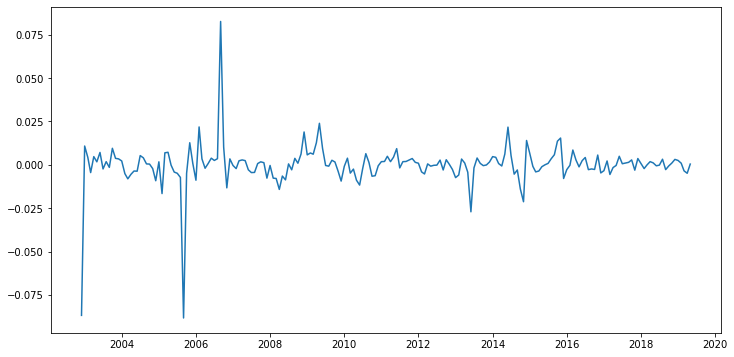

In [40]:
data_diff = data.diff()
plt.plot(data_diff)

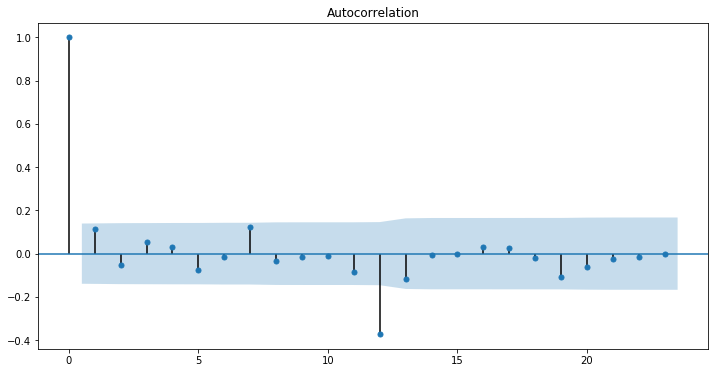

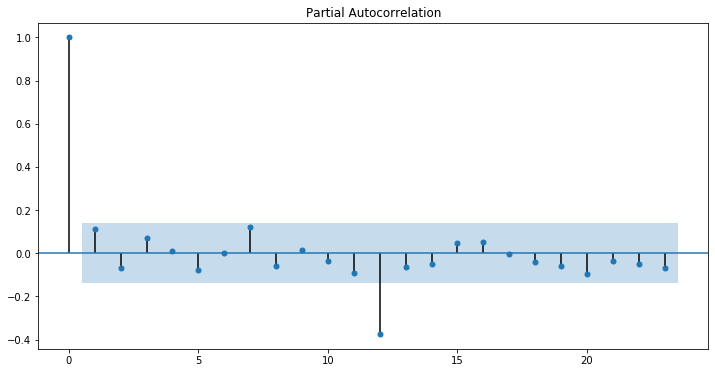

In [41]:
plot_acf(data_diff.dropna())
plt.show()
plot_pacf(data_diff.dropna())
plt.show()

In [42]:
import itertools
p= range (0,2)
d= range (1,2)
q= range (0,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1)]

In [43]:
model = ARIMA(data.Inflasi, order=(0, 1, 1))
fitted2 = model.fit(disp=0)
print(fitted2.summary())
print('  ')
print('  ')
model = ARIMA(data.Inflasi, order=(1, 1, 0))
fitted5 = model.fit(disp=0)
print(fitted5.summary())
print('  ')
print('  ')
model = ARIMA(data.Inflasi, order=(1, 1, 1))
fitted6 = model.fit(disp=0)
print(fitted6.summary())
print('  ')
print('  ')

print('parameter','         AIC','             BIC' )
for param in pdq:
    try:
        model = ARIMA(data.Inflasi, order=param)
        fitted = model.fit(disp=0)
        ramalan= fitted.forecast()[0]
        print(param, fitted.aic, fitted.bic )
    except:
        continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.Inflasi   No. Observations:                  198
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 590.664
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 24 Aug 2019   AIC                          -1175.328
Time:                        19:43:17   BIC                          -1165.463
Sample:                    05-01-2019   HQIC                         -1171.335
                         - 12-01-2002                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.001     -0.241      0.810      -0.002       0.002
ma.L1.D.Inflasi     0.1911      0.092      2.074      0.039       0.011       0.372
                                

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.Inflasi   No. Observations:                  198
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 590.227
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 24 Aug 2019   AIC                          -1174.453
Time:                        19:43:18   BIC                          -1164.589
Sample:                    05-01-2019   HQIC                         -1170.460
                         - 12-01-2002                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.001     -0.236      0.814      -0.002       0.002
ar.L1.D.Inflasi     0.1489      0.081      1.839      0.067      -0.010       0.308
                                

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\P

                             ARIMA Model Results                              
Dep. Variable:              D.Inflasi   No. Observations:                  198
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 594.062
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 24 Aug 2019   AIC                          -1180.123
Time:                        19:43:18   BIC                          -1166.970
Sample:                    05-01-2019   HQIC                         -1174.799
                         - 12-01-2002                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.001     -0.214      0.831      -0.002       0.002
ar.L1.D.Inflasi    -0.8415      0.044    -18.969      0.000      -0.928      -0.755
ma.L1.D.Inflasi     1.0000      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


(1, 1, 0) -1174.453387655671 -1164.5885865635873


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


(1, 1, 1) -1180.1232642603547 -1166.9701961375765


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


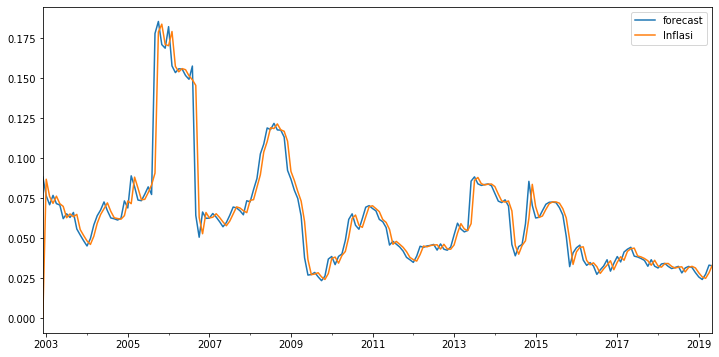

In [44]:
#Berdasarkan hasil model yang memenuhi kriteria (0, 1, 1) dan (1, 1, 0) 
#Hal tersebut dilihat juga berdasarkan prinsip Parsimoni
#Dengan melihat nilai AIC dan BIC maka digunakan parameter (1,1,0) 
model = ARIMA(data.Inflasi, order=(1,1,0))  
fitted = model.fit(disp=0)
fitted.plot_predict(dynamic=False)
plt.show()